# Airbnb Descriptive

<p>Now that we have the predictive model complete, we now look to address the qualities that most affect the experience of Airbnb guests. 
Namely, these include quality features, bedrooms, bathrooms and seasonal features that enchance/detract from one's stay.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
prices = pd.read_csv('../../data/Ames_Housing_Price_Data.csv',index_col = 0)

In [2]:
#Engineering new features relevant to Airbnb experience
prices['YrSinceUpdate'] = 2010-prices['YearRemodAdd']
prices.drop('YearRemodAdd',axis = 1,inplace = True)
prices['Total_FullBaths'] = prices['BsmtFullBath'] + prices['FullBath']
prices['Total_HalfBaths'] = prices['BsmtHalfBath'] + prices['HalfBath']
prices.drop(['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'],axis = 1, inplace = True)

In [3]:
airbnb_cols = ['PID','SalePrice','GrLivArea','BldgType','HouseStyle','OverallQual','OverallCond',
              'YearBuilt','YrSinceUpdate','ExterQual','ExterCond','BsmtQual','BsmtCond',
               'HeatingQC','CentralAir','Total_FullBaths','Total_HalfBaths','FireplaceQu',
              'BsmtFinType1','BsmtFinType2','BedroomAbvGr','KitchenQual','GarageQual','GarageCond',
               'PoolQC','MiscFeature','Functional',"Neighborhood",'Fence']

prices = prices[airbnb_cols]
prices.sample(5)

,PID,SalePrice,GrLivArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YrSinceUpdate,ExterQual,...,BsmtFinType2,BedroomAbvGr,KitchenQual,GarageQual,GarageCond,PoolQC,MiscFeature,Functional,Neighborhood,Fence
332,907252050,222000,1762,1Fam,2Story,7,5,2002,8,Gd,...,Unf,3,Gd,TA,TA,NaN,NaN,Typ,CollgCr,NaN
16,533223020,155000,1416,Twnhs,2Story,7,5,1999,11,Gd,...,Unf,3,Gd,TA,TA,NaN,NaN,Typ,Somerst,NaN
254,527210060,377426,1922,1Fam,1Story,9,5,2005,4,Gd,...,Unf,3,Gd,TA,TA,NaN,NaN,Typ,StoneBr,NaN
408,909257050,234000,2080,1Fam,2Story,7,9,1926,6,Gd,...,Unf,3,Gd,TA,TA,NaN,NaN,Typ,Crawfor,MnPrv
138,528222020,185101,1492,1Fam,2Story,7,5,2006,4,Gd,...,Unf,3,Gd,TA,TA,NaN,NaN,Typ,Gilbert,NaN


### Ensure brand quality by filtering out lower quality houses

In [4]:
prices = prices.loc[(prices.BsmtFinType1!= 'LwQ') & (prices.BsmtFinType1 !='Unf')]
prices = prices.loc[(prices.BsmtFinType2!= 'LwQ') & (prices.BsmtFinType2 !='Unf')]
prices = prices.loc[(prices.Functional == 'Typ')&(prices.OverallQual >=5)&(prices.OverallCond >=5)]
prices.drop('Functional',axis = 1, inplace = True)

# Converting quality/condition categoricals to numerical

In [5]:
def ordinal_scale(Series):
    '''Returns a pandas Series where quality scores are converted to integers
    
    Args:
    
    Series: a pandas Series of categorical quality scores'''
    return prices[Series].replace({'Po':None,'Fa':1,'TA':2,'Gd':3,'Ex':4})

In [6]:
prices['KitchenQual'] = ordinal_scale('KitchenQual')
prices['ExterQual'] = ordinal_scale('ExterQual')
prices['ExterCond'] = ordinal_scale('ExterCond')
prices['HeatingQC'] = ordinal_scale('HeatingQC')

In [7]:
def switch_ordinals(Series):
    '''
    Returns a pandas series replacing null values with DNE (Does Not Exist) so they can be imputed.
    
    Args:
    

    Series: str, column name in the pandas dataframe.
    '''
    prices[Series].fillna('DNE',inplace = True)
    prices[Series].replace({'Po':None,'DNE':1,'Fa':2,'TA':3,'Gd':4,'Ex':5},inplace = True)
    return prices[Series]

In [8]:
impute_cols = ['BsmtQual','BsmtCond','FireplaceQu',
               'BsmtFinType1','BsmtFinType2','GarageQual','GarageCond','PoolQC']
for col in impute_cols:
    prices[col] = switch_ordinals(col)


prices.update(prices[['Fence','MiscFeature']].fillna('None'))

prices.columns

Index(['PID', 'SalePrice', 'GrLivArea', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YrSinceUpdate', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir',
       'Total_FullBaths', 'Total_HalfBaths', 'FireplaceQu', 'BsmtFinType1',
       'BsmtFinType2', 'BedroomAbvGr', 'KitchenQual', 'GarageQual',
       'GarageCond', 'PoolQC', 'MiscFeature', 'Neighborhood', 'Fence'],
      dtype='object')

In [9]:
# summer_cols = ['PoolQC','CentralAir']
# winter_cols = ['FireplaceQu','HeatingQC']

In [10]:
nulls = prices.isnull().sum()
nulls[nulls>1]

FireplaceQu    4
dtype: int64

In [11]:
prices['Total_FullBaths'] = prices['Total_FullBaths'].fillna(prices['Total_FullBaths'].mean())
prices['Total_HalfBaths'] = prices['Total_HalfBaths'].fillna(prices['Total_HalfBaths'].mean())

In [12]:
nulls = prices.isnull().sum(axis = 0)
nulls[nulls>1]

FireplaceQu    4
dtype: int64

In [13]:
prices.dropna(axis = 0, how = 'any',inplace = True)

# Merge housing data with Geopy data

In [14]:
latlon = pd.read_csv('../../data/full_latlon.csv')
latlon.head()

,PID,lat,lon,dist_stadium,dist_downtown,dist_airport,coord
0,526301100,42.053808,-93.618344,4.417461,3.210441,6.102121,"(42.053808, -93.618344)"
1,526302030,42.053668,-93.618459,4.399660,3.196132,6.086080,"(42.053668, -93.618459)"
2,526302040,42.053578,-93.618276,4.395200,3.184448,6.076963,"(42.05357834520508, -93.61827582597934)"
3,526302110,42.052841,-93.618633,4.308096,3.106740,5.993553,"(42.05284062808919, -93.61863289727206)"
4,526302120,42.052853,-93.618678,4.308129,3.108530,5.994682,"(42.05285252734815, -93.61867770937495)"


In [15]:
prices = pd.merge(prices, latlon, how='inner', left_on = 'PID', right_on = 'PID' )

In [16]:
prices = prices.drop_duplicates()
prices.shape

(174, 34)

Convert the distances from km to miles

In [17]:
prices[['dist_airport','dist_downtown','dist_stadium']] = prices[['dist_airport','dist_downtown',
                                                                 'dist_stadium']].apply(lambda D: D*0.621371)

In [18]:
prices.drop('coord',axis = 1, inplace = True)

In [19]:
prices['Neighborhood'].value_counts()

NAmes      57
Edwards    16
Sawyer     15
NWAmes     14
SawyerW    11
Mitchel     9
CollgCr     7
NoRidge     6
Timber      5
Somerst     4
OldTown     4
Veenker     4
ClearCr     3
IDOTRR      3
NridgHt     3
Crawfor     3
Gilbert     2
BrkSide     2
NPkVill     2
StoneBr     2
MeadowV     1
SWISU       1
Name: Neighborhood, dtype: int64

In [20]:
prices['stadium_transp'] = prices['dist_stadium'].apply(
    lambda x: 'walking' if x <= 0.3 else ('biking' if x <= 3 else 'driving'))

In [21]:
#Houses within walking distance to stadium
prices[['SalePrice','Total_FullBaths','Total_HalfBaths','BedroomAbvGr']].loc[prices.stadium_transp == 'walking']

,SalePrice,Total_FullBaths,Total_HalfBaths,BedroomAbvGr
46,144800,2.0,0.0,2
56,257500,2.0,1.0,4


In [22]:
prices['stadium_transp'].value_counts()

biking     165
driving      7
walking      2
Name: stadium_transp, dtype: int64

In [23]:
ideal_homes = prices.drop(['PID','Neighborhood','stadium_transp'],axis = 1)

In [24]:
ideal_homes.columns

Index(['SalePrice', 'GrLivArea', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YrSinceUpdate', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'HeatingQC', 'CentralAir', 'Total_FullBaths',
       'Total_HalfBaths', 'FireplaceQu', 'BsmtFinType1', 'BsmtFinType2',
       'BedroomAbvGr', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC',
       'MiscFeature', 'Fence', 'lat', 'lon', 'dist_stadium', 'dist_downtown',
       'dist_airport'],
      dtype='object')

## Convert categorical features to numeric

In [25]:
cats = ideal_homes.select_dtypes(object).columns
cats

Index(['BldgType', 'HouseStyle', 'CentralAir', 'BsmtFinType1', 'BsmtFinType2',
       'MiscFeature', 'Fence'],
      dtype='object')

In [26]:
dummy = pd.get_dummies(ideal_homes, columns = cats,drop_first=True)

<AxesSubplot:>

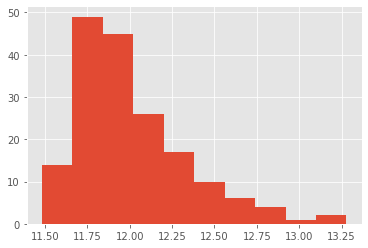

In [27]:
Y = np.log(dummy['SalePrice'])
dummy.drop(['SalePrice'],axis = 1,inplace = True)
X = dummy.copy()
X_columns = X.columns
Y.hist()

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X,Y)

LinearRegression()

In [30]:
print(f'R2: {reg.score(X,Y)}')


from sklearn.metrics import mean_squared_error
Ypred = reg.predict(X)
RMSE = mean_squared_error(Y,Ypred,squared = False)
print(f'RMSE: {RMSE}')

R2: 0.9410599286583101
RMSE: 0.08101629817472833


In [31]:
for col, coef in zip(X_columns, reg.coef_):
    print(f'{col}: {coef}')

GrLivArea: 0.18374318684174157
OverallQual: 0.07458822151873554
OverallCond: 0.035823795673820005
YearBuilt: 0.03137931569462753
YrSinceUpdate: 0.004392269164177072
ExterQual: 0.004075648467482769
ExterCond: -0.021167643801287106
BsmtQual: 0.0773506607717467
BsmtCond: 0.0306827084094543
HeatingQC: 0.006682771323363583
Total_FullBaths: 0.03686597893991956
Total_HalfBaths: 0.0021089364802419353
FireplaceQu: 0.04201207390905411
BedroomAbvGr: -0.011375650308694255
KitchenQual: 0.0074039722646532455
GarageQual: 0.017316618005525128
GarageCond: 0.007996209943284985
PoolQC: -2.0816681711721685e-17
lat: 0.05243870575241063
lon: 0.022057047819228338
dist_stadium: -0.0029876356674291837
dist_downtown: 0.05529515107955075
dist_airport: -0.04643535562589495
BldgType_2fmCon: 0.01208188977578378
BldgType_Duplex: -0.013230964846106317
BldgType_Twnhs: -0.02338620241014543
BldgType_TwnhsE: -0.020213609524105627
HouseStyle_1Story: 0.06708512877493017
HouseStyle_2Story: 0.008835988793451922
HouseStyle_SF

Text(0.5, 1.0, 'Standardized feature betas in log(SalePrice) linear model')

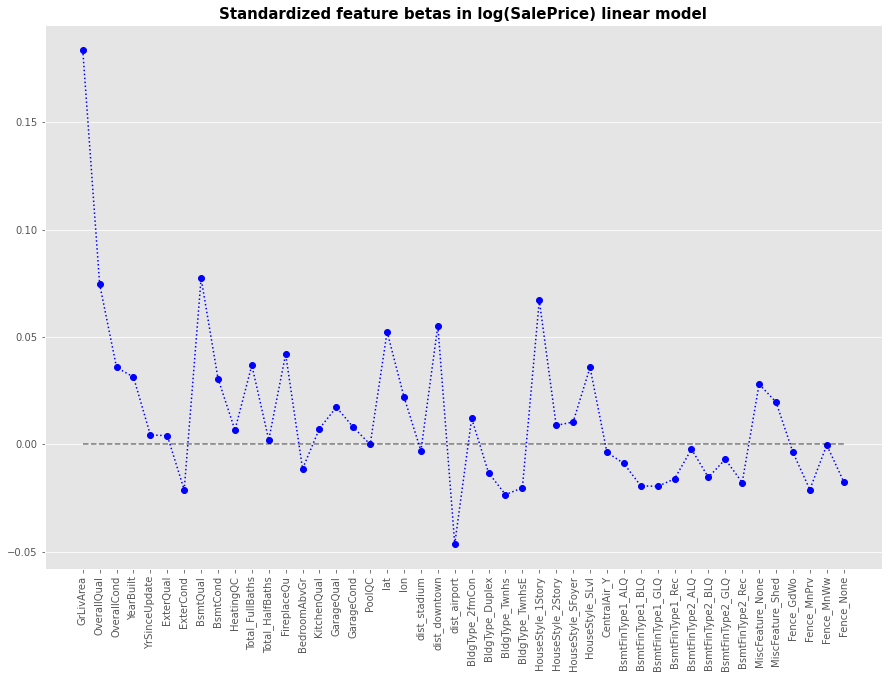

In [32]:
plt.figure(figsize = (15,10))
plt.plot(range(len(X_columns)),reg.coef_,'bo:')
plt.plot(range(len(X_columns)),np.array([0 for zero in range(len(X_columns))]),'k--',alpha = 0.49)
plt.xticks(range(len(X_columns)),labels = X_columns, rotation = 90)
plt.grid(color='r', linestyle='--', linewidth=0.5, axis = 'x',alpha = 0.5)
plt.title('Standardized feature betas in log(SalePrice) linear model', fontsize = 15, fontweight = 'bold')

In [33]:
import statsmodels.api as sm
X = sm.add_constant(X)
OLS = sm.OLS(Y,X)
results = OLS.fit()


names = X_columns.tolist()
names.insert(0,'constant')
print(results.summary(xname = names))
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     45.42
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           4.83e-60
Time:                        17:09:16   Log-Likelihood:                 190.38
No. Observations:                 174   AIC:                            -288.8
Df Residuals:                     128   BIC:                            -143.5
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
constant             12.0094      0.00

## Reducing multicollinearity using VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X_columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(dummy.values,i) for i in range(len(X_columns))]

In [35]:
good_vif = vif_data[vif_data['VIF']<=5]

In [36]:
X = dummy[good_vif['feature']]
X_columns = X.columns
X = sc.fit_transform(X)
X = sm.add_constant(X)
OLS = sm.OLS(Y,X)
results = OLS.fit()


names = X_columns.tolist()
names.insert(0,'constant')
print(results.summary(xname = names))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     42.66
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           1.55e-51
Time:                        17:09:17   Log-Likelihood:                 103.69
No. Observations:                 174   AIC:                            -167.4
Df Residuals:                     154   BIC:                            -104.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
constant             12.0094      0.01

<p>Reducing multicollinearity using VIF method decreases R2 by .10</p>